In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


In [5]:
files = [file for file in os.listdir('D:\\Sales_Data')]

all_months = pd.DataFrame()

for file in files:
    df = pd.read_csv('D:\\Sales_Data\\'+file)
    all_months = pd.concat([all_months,df])

all_months.to_csv('all_data.csv',index=False)   

In [6]:
all_data = pd.read_csv('all_data.csv')
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
nan_df = all_data[all_data.isnull().any(axis=1)]

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [10]:
all_data['Month']= all_data['Order Date'].str[0:2]
all_data['Month']= all_data['Month'].astype('int32')
type(all_data['Month'])

pandas.core.series.Series

In [11]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [12]:
cols = list(all_data.columns)
all_data = all_data[cols[0:4] + [cols[-1]] + cols[4:7]]
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [13]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


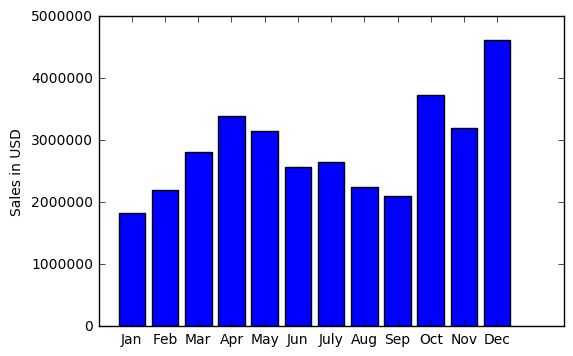

In [101]:
months = np.arange(1,13)
labels = ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']

plt.bar(months,results.Sales,align='center')
plt.xticks(months,labels)
plt.ylabel('Sales in USD')
plt.show()

In [155]:
def get_state(address):
    return address.split(',')[2][0:3]
    

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1]+" "+get_state(x))
all_data.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA
6,176562,USB-C Charging Cable,1,11.95,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,San Francisco CA
7,176563,Bose SoundSport Headphones,1,99.99,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,Seattle WA
8,176564,USB-C Charging Cable,1,11.95,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,Atlanta GA
9,176565,Macbook Pro Laptop,1,1700.00,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,San Francisco CA
10,176566,Wired Headphones,1,11.99,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,Boston MA


In [156]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta GA,16602,2.779908e+06,2.795499e+06,104794
Austin TX,11153,1.809874e+06,1.819582e+06,69829
Boston MA,22528,3.637410e+06,3.661642e+06,141112
Dallas TX,16730,2.752628e+06,2.767975e+06,104620
Los Angeles CA,33289,5.421435e+06,5.452571e+06,208325
New York City NY,27932,4.635371e+06,4.664317e+06,175741
Portland ME,2750,4.471893e+05,4.497583e+05,17144
Portland OR,11303,1.860558e+06,1.870732e+06,70621
San Francisco CA,50239,8.211462e+06,8.262204e+06,315520


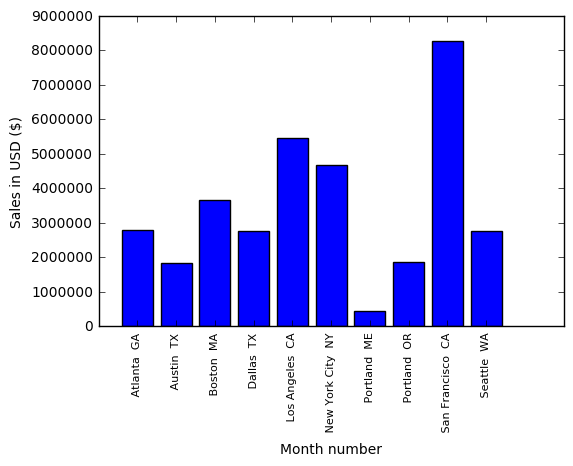

In [157]:
keys = [city for city, df in all_data.groupby(['City'])]
total = all_data['City'].unique()
y = np.arange(1,1+len(total))
plt.bar(y,results['Sales'],align='center')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(y,keys, rotation='vertical', size=8)
plt.show()

In [15]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [16]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,1
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,1
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,1
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,1


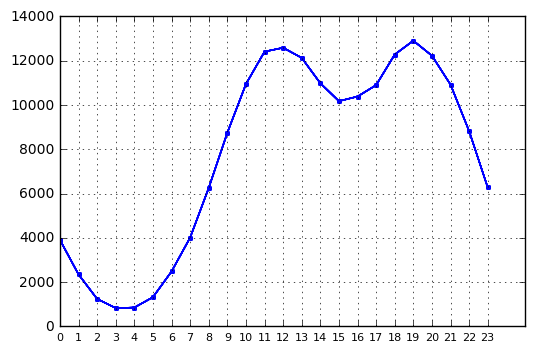

In [171]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'],'b.-')
plt.xticks(keys,size=8)
plt.grid()
plt.show()


In [172]:
all_data.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Minute,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [17]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Hour,Minute,Count
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,1
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,1
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,19,42,1
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,11,31,1
31,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,11,31,1
32,176586,AAA Batteries (4-pack),2,2.99,5.98,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,17,0,1
33,176586,Google Phone,1,600.00,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,17,0,1
119,176672,Lightning Charging Cable,1,14.95,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11,7,1
120,176672,USB-C Charging Cable,1,11.95,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11,7,1


In [18]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [32]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [35]:
df2

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


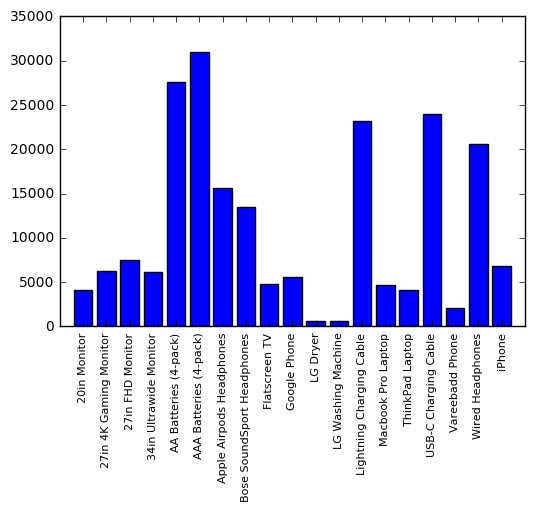

In [77]:

product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
y = np.arange(1,len(keys)+1)
plt.bar(y, quantity_ordered,align='center')
plt.xticks(y,keys, rotation='vertical', size=8)
plt.show()

In [73]:
quantity_ordered = product_group.sum()
quantity_ordered

,Quantity Ordered,Price Each,Sales,Month,Hour,Minute,Count
Product,,,,,,,
20in Monitor,4129,451068.99,454148.71,29336,58764,122252,4101
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,44440,90916,184331,6230
27in FHD Monitor,7550,1125974.93,1132424.50,52558,107540,219948,7507
34in Ultrawide Monitor,6199,2348718.19,2355558.01,43304,89076,183480,6181
AA Batteries (4-pack),27635,79015.68,106118.40,145558,298342,609039,20577
AAA Batteries (4-pack),31017,61716.59,92740.83,146370,297332,612113,20641
Apple Airpods Headphones,15661,2332350.00,2349150.00,109477,223304,455570,15549
Bose SoundSport Headphones,13457,1332366.75,1345565.43,94113,192445,392603,13325
Flatscreen TV,4819,1440000.00,1445700.00,34224,68815,142789,4800


In [75]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(y, quantity_ordered,align='center')
ax1.set_xticklabels(y,keys, rotation='vertical', size=8)
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(y,keys, rotation='vertical', size=8)

fig.show()

TypeError: unorderable types: str() < int()